In [1]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\users\dell\appdata\local\programs\python\python312\lib\site-packages (1.4.1.post1)



In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('E:/4-2/Crimes_-_One_year_prior_to_present.csv')
df.head()

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JG497095,11/08/2023 08:50:00 PM,025XX N KEDZIE BLVD,0810,THEFT,OVER $500,STREET,N,N,1414,35.0,06,1154609.0,1916759.0,41.927407,-87.707294,"(41.927407329, -87.70729439)"
1,JG496991,11/08/2023 03:14:00 PM,0000X W CHICAGO AVE,0560,ASSAULT,SIMPLE,STREET,N,N,1832,42.0,08A,1176106.0,1905725.0,41.896672,-87.628635,"(41.896671699, -87.628635323)"
2,JG497145,11/08/2023 10:55:00 PM,019XX W 47TH ST,051A,ASSAULT,AGGRAVATED - HANDGUN,SIDEWALK,N,N,931,15.0,04A,1164331.0,1873509.0,41.808525,-87.672793,"(41.808525157, -87.672792896)"
3,JG496701,11/08/2023 04:39:00 PM,025XX W BALMORAL AVE,502P,OTHER OFFENSE,FALSE / STOLEN / ALTERED TRP,STREET,N,N,2011,40.0,26,1158314.0,1935772.0,41.979505,-87.693158,"(41.979505088, -87.693158103)"
4,JG484195,10/28/2023 07:30:00 PM,067XX S PARNELL AVE,0810,THEFT,OVER $500,APARTMENT,N,N,722,6.0,06,1173732.0,1860233.0,41.771891,-87.638706,"(41.771890947, -87.638705659)"


In [15]:
pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.3 kB ? eta -:--:--
     --------- --------------------------- 41.0/162.3 kB 487.6 kB/s eta 0:00:01
     --------------------- --------------- 92.2/162.3 kB 871.5 kB/s eta 0:00:01
     ---------------------------------- - 153.6/162.3 kB 919.0 kB/s eta 0:00:01
     ------------------------------------ 162.3/162.3 kB 808.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
    --------------------------------------- 0.1/7.6 MB 3.6 MB/s eta 0:00:03
   - -------------------------------------- 0.2/7.6 MB 3.0 MB/s eta 0:00:03
   - -------------------------------------- 0.4/7.6 MB 2.9 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/7.6 MB 3.2 MB/s eta 0:00:03
   --- ------------------------------------ 0.7/7.6 MB 3.3 MB/s eta 0:00:03
   ---- -----------


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


                  PRIMARY DESCRIPTION  count
0                               ARSON    496
1                             ASSAULT  22661
2                             BATTERY  44309
3                            BURGLARY   7288
4   CONCEALED CARRY LICENSE VIOLATION    195
5                     CRIMINAL DAMAGE  29805
6             CRIMINAL SEXUAL ASSAULT   1578
7                   CRIMINAL TRESPASS   4669
8                  DECEPTIVE PRACTICE  15751
9                            GAMBLING     14
10                           HOMICIDE    607
11                  HUMAN TRAFFICKING      9
12   INTERFERENCE WITH PUBLIC OFFICER    593
13                       INTIMIDATION    217
14                         KIDNAPPING    135
15               LIQUOR LAW VIOLATION    183
16                MOTOR VEHICLE THEFT  27683
17                          NARCOTICS   5155
18                       NON-CRIMINAL      3
19                          OBSCENITY     42
20         OFFENSE INVOLVING CHILDREN   1665
21        

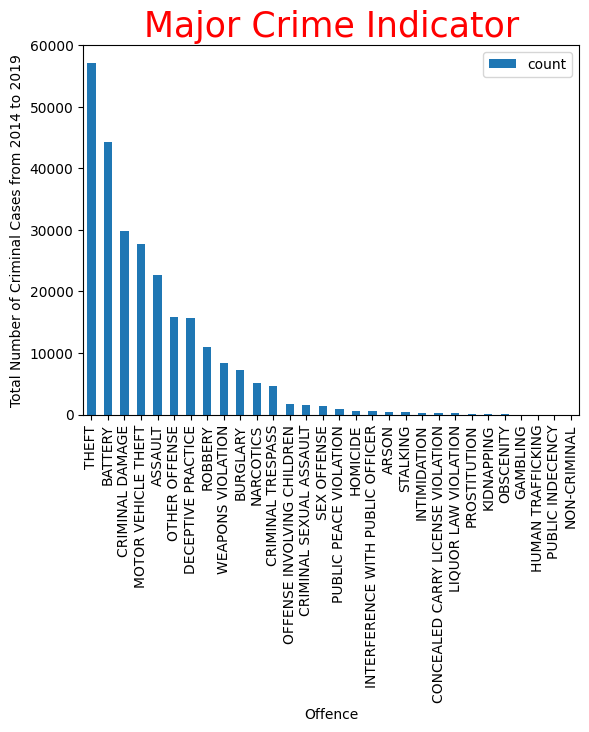

In [17]:
import matplotlib.pyplot as plt

major_crime_indicator = df.groupby(' PRIMARY DESCRIPTION').size().reset_index(name='count')
print(major_crime_indicator)


ct = major_crime_indicator.sort_values(by='count', ascending=False)
ax = ct.plot.bar(x=' PRIMARY DESCRIPTION', y='count')
ax.set_xlabel('Offence')
ax.set_ylabel('Total Number of Criminal Cases')
ax.set_title('Major Crime Indicator', color='red', fontsize=25)
plt.show()


In [23]:
import pandas as pd

# Convert 'DATE OF OCCURRENCE' to datetime format
df['DATE  OF OCCURRENCE'] = pd.to_datetime(df['DATE  OF OCCURRENCE'])

# Extract hour from 'DATE OF OCCURRENCE'
df['hour'] = df['DATE  OF OCCURRENCE'].dt.hour

# Now 'hour' column contains only the hour component
print(df['hour'])


0         20
1         15
2         22
3         16
4         19
          ..
258278    17
258279    12
258280     0
258281     1
258282     5
Name: hour, Length: 258283, dtype: int32


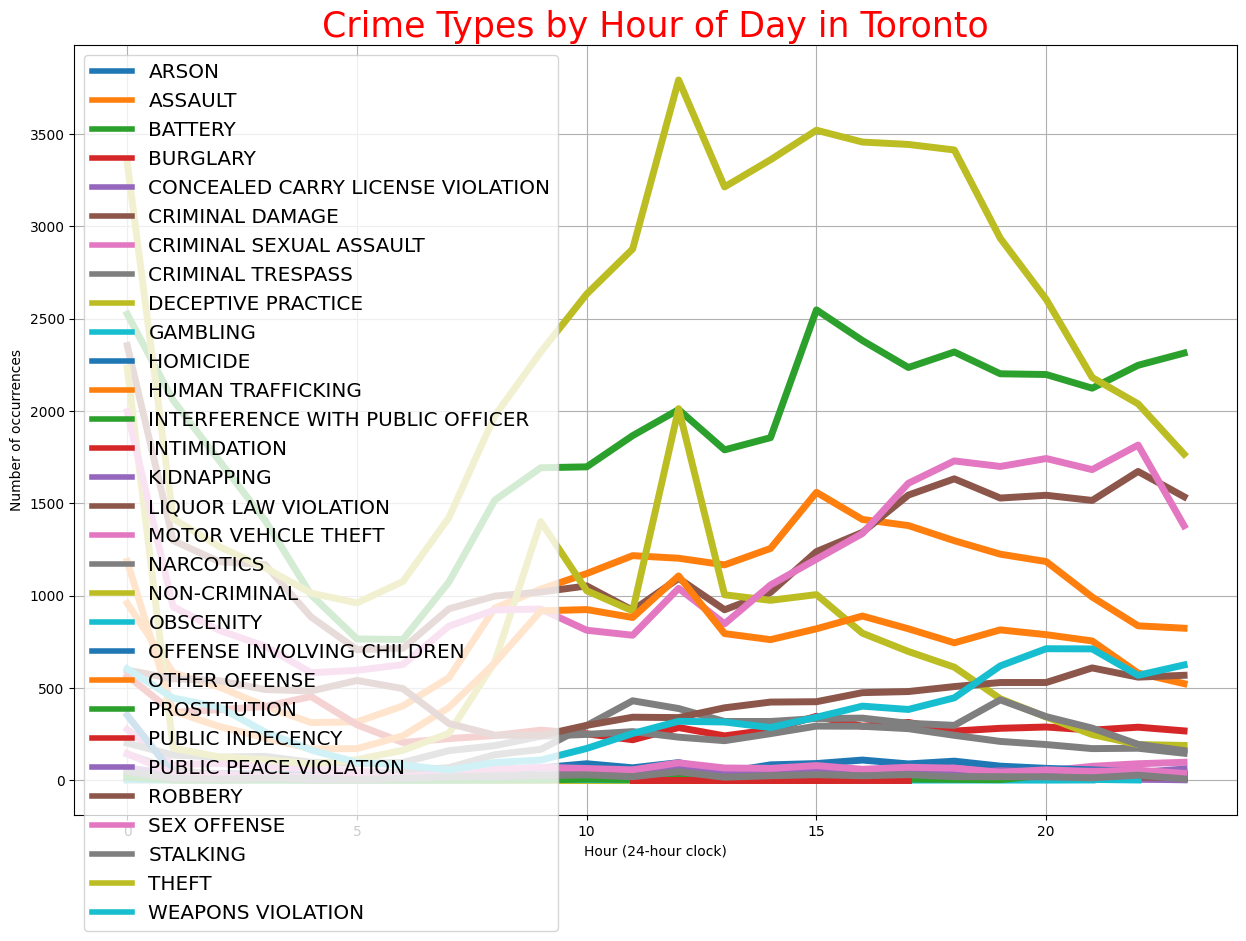

In [27]:
hour_crime_group = df.groupby(['hour', ' PRIMARY DESCRIPTION']).size().reset_index(name='Total')

fig, ax = plt.subplots(figsize=(15, 10))
for crime_type, data in hour_crime_group.groupby(' PRIMARY DESCRIPTION'):
    ax.plot(data['hour'], data['Total'], label=crime_type, linewidth=5)

ax.set_xlabel('Hour (24-hour clock)')
ax.set_ylabel('Number of occurrences')
ax.set_title('Crime Types by Hour of Day in Toronto', color='red', fontsize=25)
ax.grid(linestyle='-')
leg = plt.legend(fontsize='x-large')
leg_lines = leg.get_lines()
plt.setp(leg_lines, linewidth=4)
plt.show()


year
2023    224776
2024     33507
dtype: int64


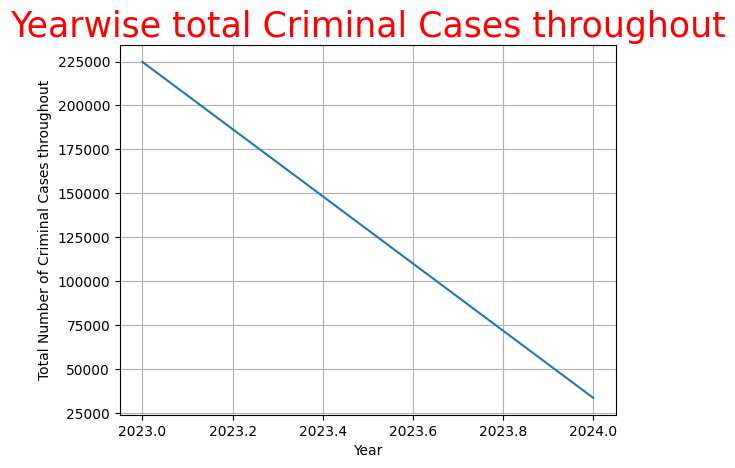

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'DATE OF OCCURRENCE' to datetime format
df['DATE  OF OCCURRENCE'] = pd.to_datetime(df['DATE  OF OCCURRENCE'])

# Extract year from 'DATE OF OCCURRENCE'
df['year'] = df['DATE  OF OCCURRENCE'].dt.year

# Filter data for years greater than 2013
df2 = df[df['year'] > 2013]

# Group by year and count the occurrences
yearwise_total_crime = df2.groupby('year').size()

print(yearwise_total_crime)


ct = yearwise_total_crime.sort_index(ascending=True)  # Sort by year
ax = ct.plot.line()
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Criminal Cases throughout')
ax.set_title('Yearwise total Criminal Cases throughout', color='red', fontsize=25)
ax.grid(linestyle='-')
plt.show()


ARREST
N    227280
Y     31003
Name: count, dtype: int64


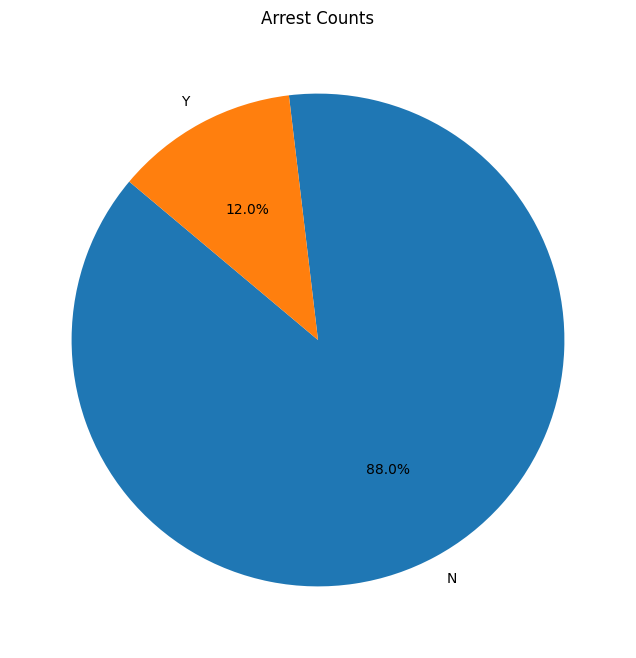

In [20]:
import matplotlib.pyplot as plt

# Count occurrences of 'Y' and 'N' in the 'ARREST' column
arrest_counts = df['ARREST'].value_counts()

print(arrest_counts)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(arrest_counts, labels=arrest_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Arrest Counts')
plt.show()


In [28]:
import pandas as pd

# Convert 'DATE OF OCCURRENCE' to datetime format
df['DATE  OF OCCURRENCE'] = pd.to_datetime(df['DATE  OF OCCURRENCE'])

# Extract hour from 'DATE OF OCCURRENCE'
df['month'] = df['DATE  OF OCCURRENCE'].dt.month

# Now 'hour' column contains only the hour component
print(df['hour'])


0         20
1         15
2         22
3         16
4         19
          ..
258278    17
258279    12
258280     0
258281     1
258282     5
Name: hour, Length: 258283, dtype: int32


In [30]:
pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


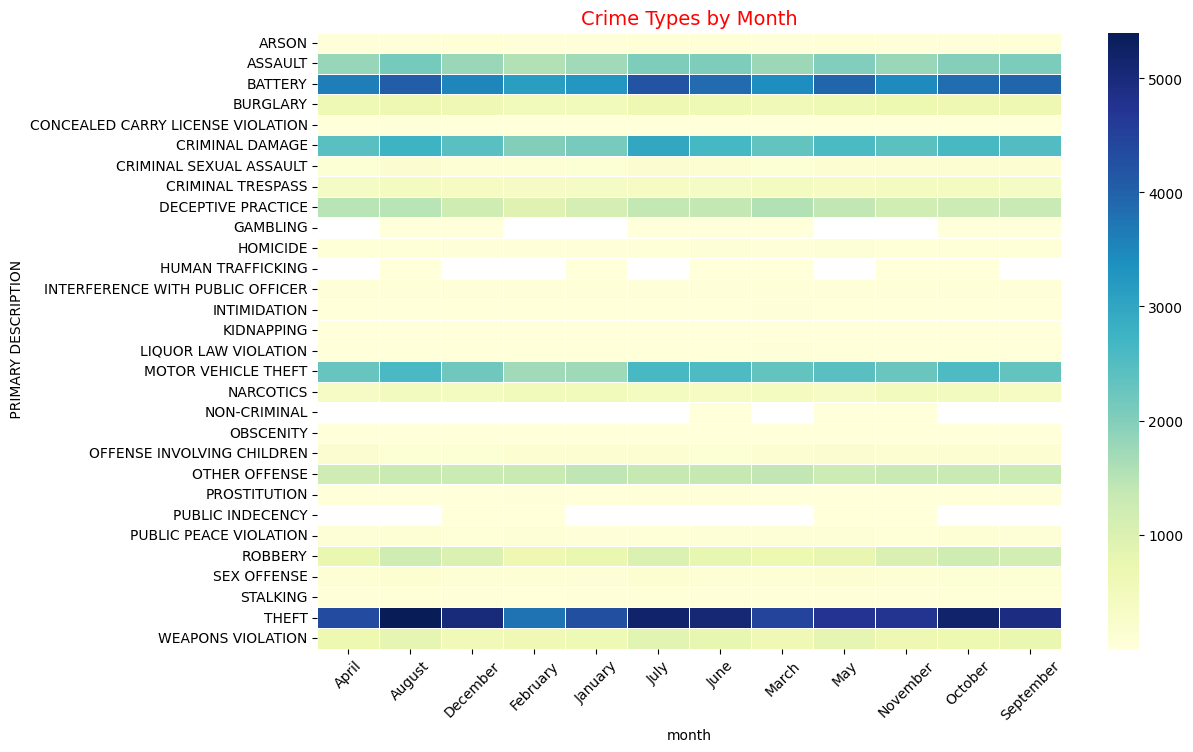

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'DATE OF OCCURRENCE' to datetime format
df['DATE  OF OCCURRENCE'] = pd.to_datetime(df['DATE  OF OCCURRENCE'])

# Extract month from 'DATE OF OCCURRENCE'
df['month'] = df['DATE  OF OCCURRENCE'].dt.month_name()

# Group by month and PRIMARY DESCRIPTION, then count occurrences
description_monthwise = df.groupby(['month', ' PRIMARY DESCRIPTION']).size().reset_index(name='Total')

# Pivot the data to have PRIMARY DESCRIPTION as rows, month as columns, and Total as values
crime_count = description_monthwise.pivot(index=" PRIMARY DESCRIPTION", columns="month", values="Total")

# Plot heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(crime_count, cmap="YlGnBu", linewidths=.5)
plt.title("Crime Types by Month", color='red', fontsize=14)
plt.xticks(rotation=45)
plt.show()


In [ ]:
import geopandas as gpd
np = 'C:/Users/ABC/Desktop/Crime/Maps/Neighbourhoods.shp'
regions = gpd.read_file(np)
#regions.head()

crime_by_neighbourhood = df.groupby('Neighbourhood',as_index=False).agg({'Total':'sum'})
merged = regions.set_index('FIELD_7').join(crime_by_neighbourhood.set_index('Neighbourhood'))
merged.head()

In [3]:

from sklearn.preprocessing import LabelEncoder


# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns


# Initialize LabelEncoder
label_encoder = LabelEncoder()


# Iterate over non-numeric columns and apply Label Encoding
for column in non_numeric_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Now all non-numeric columns have been converted to numeric data types


In [4]:
df.fillna(df.mean(), inplace=True)

In [5]:
x=['DATE  OF OCCURRENCE','BLOCK',' IUCR',' SECONDARY DESCRIPTION',' LOCATION DESCRIPTION']
y=[' PRIMARY DESCRIPTION']

In [6]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df[x],df[y], test_size=0.3, random_state=57)

# Here, test_size=0.2 indicates that 20% of the data will be used for testing, and the rest will be used for training.
# random_state is set for reproducibility.

# Display the shapes of the resulting datasets
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (180798, 5)
Shape of x_test: (77485, 5)
Shape of y_train: (180798, 1)
Shape of y_test: (77485, 1)


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier
knn_classifier.fit(x_train_scaled, y_train)

# Predict on the testing set
y_pred_knn = knn_classifier.predict(x_test_scaled)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN Accuracy: 0.9464799638639737
